![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools, collections
import ast

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
17385,id_1360,Dublin,"['Indian', 'Balti', 'Asian', 'Eastern European...",1364.0,$$ - $$$,43.0,"[['Good food and good service', 'Favourite Ind...",/Restaurant_Review-g186605-d9749652-Reviews-In...,d9749652,1,4.5
5908,id_5908,Berlin,NaN,3734.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d12473890-Reviews-T...,d12473890,0,0.0
35713,id_6179,Berlin,NaN,6181.0,NaN,30.0,"[['Horrible service - hard to believe', 'Greas...",/Restaurant_Review-g187323-d1345015-Reviews-Po...,d1345015,1,2.5
23361,id_5338,Berlin,"['Italian', 'Pizza']",5340.0,$$ - $$$,10.0,"[['Very tasty Italian food, very good value f....",/Restaurant_Review-g187323-d2361194-Reviews-Ri...,d2361194,1,3.5
41130,id_6143,London,['Cafe'],6152.0,$,21.0,"[['Excellent breakfast if you are hungry!', 'L...",/Restaurant_Review-g186338-d8059392-Reviews-Ro...,d8059392,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [20]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
40255,id_1170,"['Cafe', 'Turkish', 'Vegan Options', 'Vegetari...",1171.0,$,5.0,"[['Great lunch, fresh ingredients, cooked-to.....",/Restaurant_Review-g4049419-d7732625-Reviews-P...,d7732625,1,4.5,...,0,0,0,0,0,0,0,0,0,0
24480,id_6502,"['French', 'European']",6503.0,$$ - $$$,42.0,"[['Hidden gem at Bonne Marche', 'As I remember...",/Restaurant_Review-g187147-d2274270-Reviews-Au...,d2274270,1,4.0,...,0,0,1,0,0,0,0,0,0,0
19993,id_5178,NaN,5181.0,NaN,9.0,"[[], []]",/Restaurant_Review-g187849-d8339763-Reviews-Du...,d8339763,1,3.0,...,0,0,0,0,0,0,0,0,0,0
41731,id_733,"['Chinese', 'Japanese', 'Sushi', 'Asian', 'Fus...",734.0,$$$$,865.0,"[['Varied menu and tasty dishes', 'Enjoyed our...",/Restaurant_Review-g187514-d2191141-Reviews-Ze...,d2191141,1,3.5,...,0,0,0,0,0,0,0,0,0,0
20010,id_1887,"['French', 'European', 'Wine Bar', 'Vegetarian...",1888.0,$$ - $$$,76.0,"[['Authentic', 'Friendly staff and delicious f...",/Restaurant_Review-g187147-d10358815-Reviews-L...,d10358815,1,4.0,...,0,0,1,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [23]:
# Ваша обработка 'Price Range'
priceMap = {
    '$$ - $$$': 2,
    '$$$$': 3,
    '$': 1
}
# Создание признака с метками для 'Price Range'
data['PriceRange'] = data['Price Range'].map(priceMap)
# Создание признака isNAN для 'Price Range'
data['PriceRange_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
# Заполнение пропусков средним значением
data.PriceRange.fillna(2, inplace=True)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [24]:
# тут ваш код на обработку других признаков
# .....

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

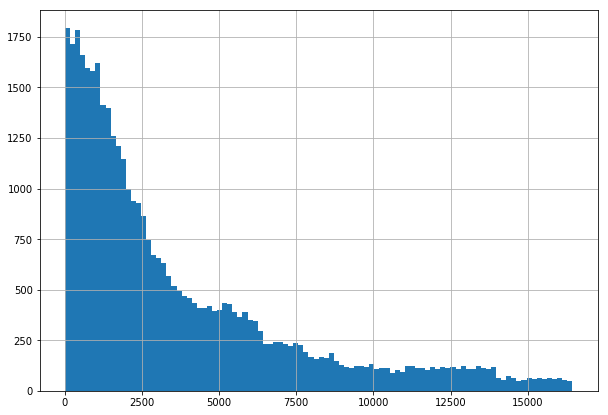

In [25]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

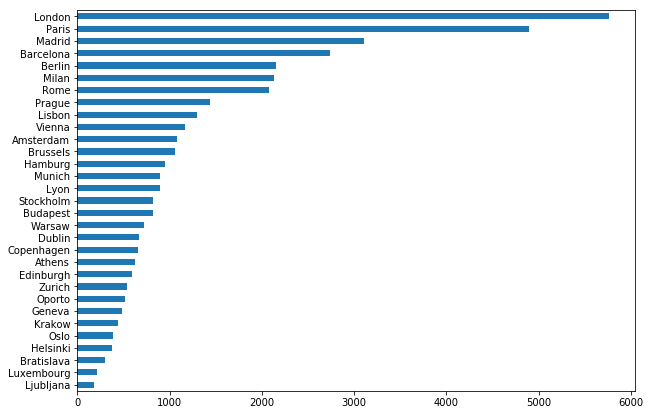

In [26]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

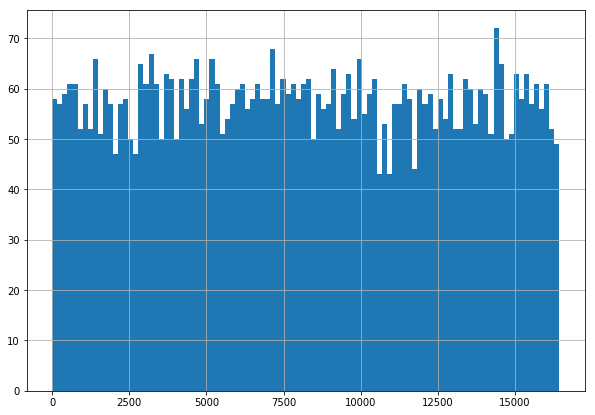

In [27]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

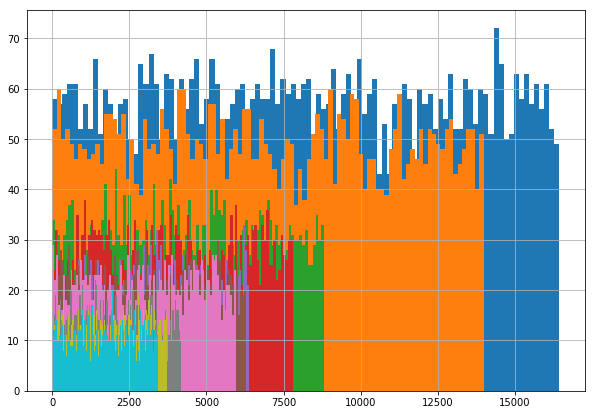

In [28]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

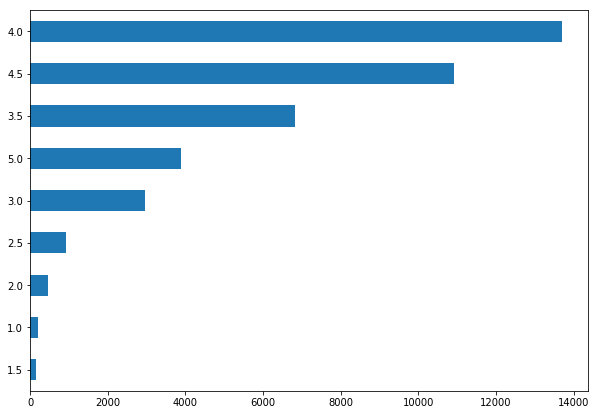

In [29]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

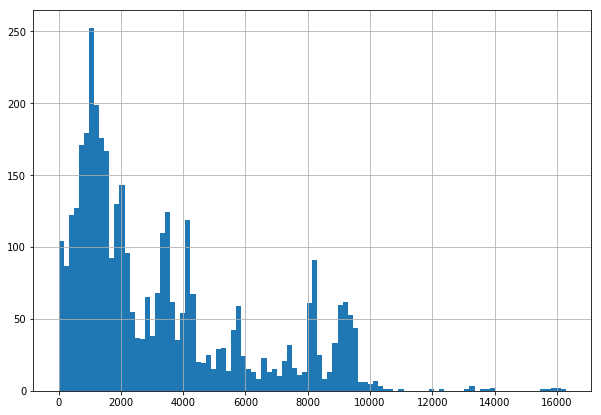

In [30]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

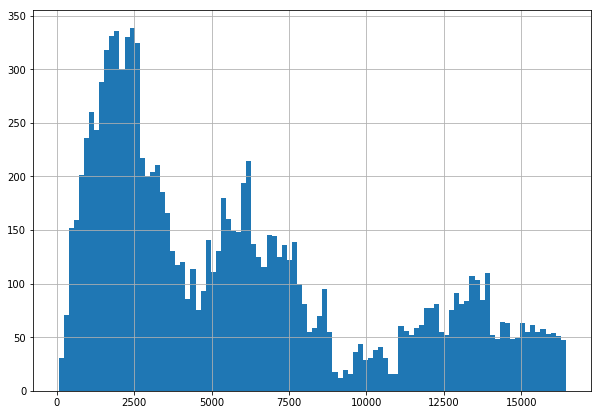

In [31]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

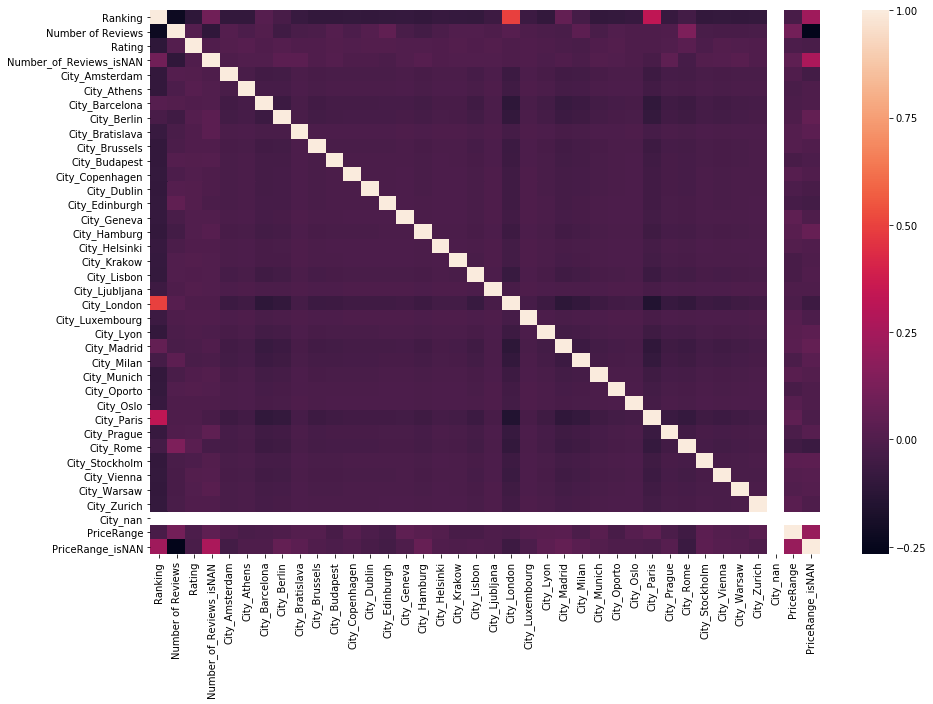

In [32]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [33]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [34]:
def preproc_data1(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [35]:
def parseRev(x, i, j):
    if len(x) > i:
        y = x[i]
        if len(y) > j:
            return y[j]
    return np.NaN

In [36]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df['Cuisine Style'].fillna("['Blank Style']", inplace=True)

    
    
#     # ################### 3. Encoding ############################################################## 
#     # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#     df = pd.get_dummies(df, columns=[ 'City',], dummy_na=True)
    # Обработка 'Price Range'
    priceMap = {
        '$$ - $$$': 2,
        '$$$$': 3,
        '$': 1
    }
    df['Price Range'] = df['Price Range'].map(priceMap)
#     # 'Cuisine Style'
#     chain = itertools.chain.from_iterable(df['Cuisine Style'])
#     counter = collections.Counter(chain)
#     styles = counter.most_common(15)
#     styles = pd.Series(styles).apply(lambda x: x[0])
#     for c in styles:
#         df['Style_' + c] = df['Cuisine Style'].apply(lambda x: int(c in x))
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # 'Reviews'
    df["Reviews"].fillna("[[], []]", inplace=True)
    df_rev = df['Reviews'].str.replace("nan", "' '").apply(ast.literal_eval)
    df['Reviews_date1'] = pd.to_datetime(df_rev.apply(parseRev, i=1, j=0))
    df['Reviews_date2'] = pd.to_datetime(df_rev.apply(parseRev, i=1, j=1))
    df['Reviews_deltaTime'] = (df.Reviews_date1 - df.Reviews_date2).dt.days
    Reviews_dateMax = pd.Series([df.Reviews_date1.max(), df.Reviews_date2.max()]).max()
    df['Reviews_deltaTimeFromMax1'] = (Reviews_dateMax - df.Reviews_date1).dt.days
    df['Reviews_date1_Y'] = df.Reviews_date1.dt.year
    df['Reviews_date1_M'] = df.Reviews_date1.dt.month
    df['Reviews_date1_DW'] = df.Reviews_date1.dt.dayofweek
#     df = pd.get_dummies(df, columns=[ 'Reviews_date1_DW',], dummy_na=True)
    df['Reviews_text1'] = df_rev.apply(parseRev, i=0, j=0)
    df['Reviews_text2'] = df_rev.apply(parseRev, i=0, j=1)
    df['ReviewsTexts'] = df['Reviews_text1'].fillna('') + " " + df['Reviews_text2'].fillna('')
    df['ReviewsTexts'] = df['ReviewsTexts'].str.lower().str.split(' ')
    # Создание признака isNAN для 'Price Range'
    data['PriceRange_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
    # 'Cuisine Style'
    df['Cuisine Style'] = df['Cuisine Style'].apply(ast.literal_eval)
    df['NumberCuisneStyle'] = df['Cuisine Style'].apply(lambda x: len(x))
    # Нормализация 'Ranking' по городам
    cityR = df.groupby('City')['Ranking'].max()
    df['Ranking'] = df['Ranking'] / df['City'].apply(lambda x: cityR[x])



    # ################### 5. NAN ############################################################## 
    # Заполнение пропусков средним значением
    df['Price Range'].fillna(2, inplace=True)
    df.Reviews_deltaTime.fillna(round(df.Reviews_deltaTime.mean()), inplace=True)
    df.Reviews_deltaTimeFromMax1.fillna(round(df.Reviews_deltaTimeFromMax1.mean()), inplace=True)
    df['Reviews_date1_Y'].fillna(round(df.Reviews_date1_Y.mean()), inplace=True)
    df['Reviews_date1_M'].fillna(round(df.Reviews_date1_M.mean()), inplace=True)
    df['NumberOfReviews'] = df['Number of Reviews'].fillna(round(df['Number of Reviews'].mean()))
    df.NumberCuisneStyle = df.NumberCuisneStyle.apply(lambda x: x if x > 0 else 3)

    # ################### 6. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df = pd.get_dummies(df, columns=[ 'City',], dummy_na=True)
#     # Обработка 'Price Range'
#     priceMap = {
#         '$$ - $$$': 2,
#         '$$$$': 3,
#         '$': 1
#     }
#     df['Price Range'] = df['Price Range'].map(priceMap)
    # 'Cuisine Style'
    chain = itertools.chain.from_iterable(df['Cuisine Style'])
    counter = collections.Counter(chain)
    styles = counter.most_common(15)
    styles = pd.Series(styles).apply(lambda x: x[0])
    for c in styles:
        df['Style_' + c] = df['Cuisine Style'].apply(lambda x: int(c in x))
    # 'Reviews_date1_DW'
    df = pd.get_dummies(df, columns=[ 'Reviews_date1_DW',], dummy_na=True)
    # 'ReviewsTexts'
    revW = [
     'good',
     'great',
     'nice',
     'very',
     'service',
     'best',
     'excellent',
     'but',
     'not',
     'delicious',
     'lovely',
     'friendly',
     'amazing',
     'tasty',
     'little',
     'atmosphere',
     'local',
     'staff',
     'experience',
     'value',
     'average',
     'authentic',
     'fantastic',
     'quick',
    ]
    for c in revW:
        df['rev_' + c] = df['ReviewsTexts'].apply(lambda x: int(c in x))

    
    # ################### 7. Clean #################################################### 
    df.drop(['Reviews_date1', 'Reviews_date2', 'Number of Reviews'], axis=1, inplace=True)
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df.columns if df[s].dtypes == 'object']
    df.drop(object_columns, axis = 1, inplace=True)
    
    return df

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [37]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,sample,Rating,Reviews_deltaTime,Reviews_deltaTimeFromMax1,Reviews_date1_Y,Reviews_date1_M,NumberCuisneStyle,NumberOfReviews,...,rev_little,rev_atmosphere,rev_local,rev_staff,rev_experience,rev_value,rev_average,rev_authentic,rev_fantastic,rev_quick
6292,0.734364,2.0,0,0.0,125.0,298.0,2017.0,7.0,2,38.0,...,0,0,0,0,0,0,0,0,0,0
6839,0.613527,2.0,0,0.0,125.0,298.0,2017.0,7.0,1,3.0,...,0,0,0,0,0,0,0,0,0,0
13798,0.057464,2.0,1,4.5,182.0,57.0,2017.0,12.0,4,200.0,...,0,0,0,0,0,0,0,0,0,0
28801,0.007219,2.0,1,4.5,2.0,50.0,2018.0,1.0,5,1092.0,...,0,0,0,0,0,0,0,0,0,0
42214,0.186694,2.0,1,4.0,12.0,78.0,2017.0,12.0,6,70.0,...,0,0,0,0,0,0,0,0,0,0
35465,0.274355,2.0,1,4.0,-203.0,256.0,2017.0,6.0,7,92.0,...,0,0,0,0,0,0,0,0,0,0
45357,0.862899,1.0,1,3.5,176.0,138.0,2017.0,10.0,3,16.0,...,0,0,0,0,0,0,0,0,0,0
49276,0.031569,2.0,1,4.5,22.0,84.0,2017.0,12.0,9,180.0,...,0,0,0,0,0,0,0,0,0,0
9621,0.566855,2.0,0,0.0,81.0,183.0,2017.0,8.0,1,7.0,...,0,0,0,0,0,0,0,0,0,0
39108,0.653815,2.0,1,4.0,125.0,298.0,2017.0,7.0,1,6.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 89 columns):
Ranking                      50000 non-null float64
Price Range                  50000 non-null float64
sample                       50000 non-null int64
Rating                       50000 non-null float64
Reviews_deltaTime            50000 non-null float64
Reviews_deltaTimeFromMax1    50000 non-null float64
Reviews_date1_Y              50000 non-null float64
Reviews_date1_M              50000 non-null float64
NumberCuisneStyle            50000 non-null int64
NumberOfReviews              50000 non-null float64
City_Amsterdam               50000 non-null uint8
City_Athens                  50000 non-null uint8
City_Barcelona               50000 non-null uint8
City_Berlin                  50000 non-null uint8
City_Bratislava              50000 non-null uint8
City_Brussels                50000 non-null uint8
City_Budapest                50000 non-null uint8
City_Copenhagen          

In [39]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [40]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [41]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 88), (40000, 88), (40000, 87), (32000, 87), (8000, 87))

# Model 
Сам ML

In [42]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [43]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [44]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [45]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20180125000000002


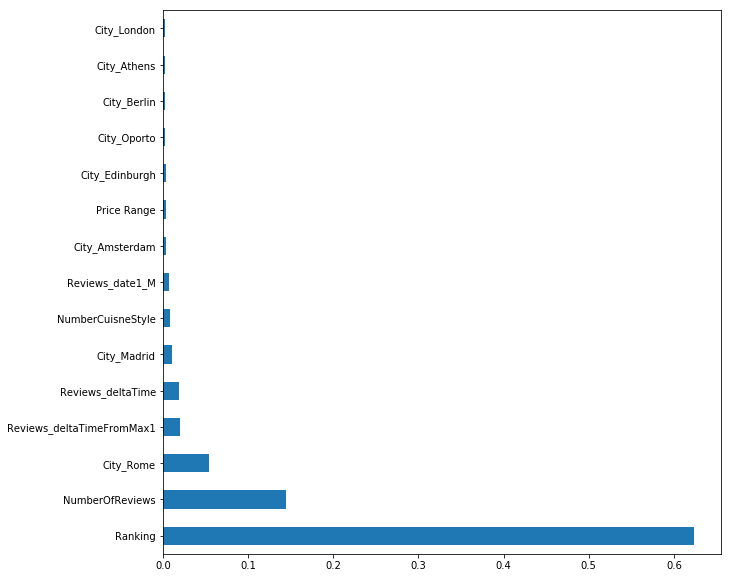

In [46]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [47]:
test_data.sample(10)

,Ranking,Price Range,Rating,Reviews_deltaTime,Reviews_deltaTimeFromMax1,Reviews_date1_Y,Reviews_date1_M,NumberCuisneStyle,NumberOfReviews,City_Amsterdam,...,rev_little,rev_atmosphere,rev_local,rev_staff,rev_experience,rev_value,rev_average,rev_authentic,rev_fantastic,rev_quick
1066,0.228322,2.0,0.0,12.0,53.0,2018.0,1.0,5,36.0,0,...,0,0,0,0,0,0,0,0,0,0
3761,0.408332,2.0,0.0,125.0,184.0,2017.0,8.0,1,5.0,0,...,0,0,0,0,0,0,0,0,0,0
4818,0.842334,2.0,0.0,1037.0,897.0,2015.0,9.0,1,3.0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0.694965,2.0,0.0,49.0,932.0,2015.0,8.0,1,3.0,0,...,0,0,0,0,0,0,0,0,0,0
7647,0.197662,1.0,0.0,81.0,145.0,2017.0,10.0,3,45.0,0,...,0,0,0,0,0,0,0,0,0,0
884,0.060172,2.0,0.0,1.0,55.0,2018.0,1.0,5,355.0,0,...,0,0,0,0,0,0,0,0,0,0
8139,0.196639,2.0,0.0,89.0,74.0,2017.0,12.0,3,42.0,0,...,0,0,0,0,0,0,0,0,0,0
4687,0.759487,2.0,0.0,125.0,861.0,2015.0,10.0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1943,0.376774,1.0,0.0,125.0,846.0,2015.0,11.0,1,13.0,0,...,0,0,0,0,0,0,1,0,0,0
5410,0.291309,2.0,0.0,49.0,91.0,2017.0,11.0,1,10.0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_data = test_data.drop(['Rating'], axis=1)

In [49]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [50]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [51]:
predict_submission

array([3.   , 4.225, 4.5  , ..., 3.17 , 4.5  , 4.265])

In [52]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.225
2,id_2,4.500
3,id_3,4.355
4,id_4,4.500
5,id_5,4.370
6,id_6,2.150
7,id_7,3.550
8,id_8,4.195
9,id_9,4.620


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
